<a href="https://colab.research.google.com/github/rahulvenkat207/AI_InnovateHub/blob/main/ID3prgm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from numpy import log2
eps = np.finfo(float).eps

Entropy Funciton for target variable

In [3]:
def find_entropy(df):
  Class = df.keys()[-1]
  entropy = 0
  values = df[Class].unique()
  for value in values:
    fraction = df[Class].value_counts()[value]/len(df[Class])
    entropy += -fraction * np.log2(fraction)
  return entropy

Entropy function for attributes

In [4]:
def find_entropy_attribute(df, attribute):
    Class = df.keys()[-1]
    target_variables = df[Class].unique()
    variables = df[attribute].unique()
    entropy2 = 0
    for variable in variables:
        entropy = 0
        den = len(df[attribute][df[attribute] == variable])
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute] == variable][df[Class] == target_variable])
            fraction = num / (den + eps)
            entropy += -fraction * np.log2(fraction + eps)
        fraction2 = den / len(df)
        entropy2 += fraction2 * entropy
    return abs(entropy2)


Calculating Information Gain and returning the attribute with high Information gain

In [5]:
def find_winner(df):
  Entropy_att = []
  IG = []
  for key in df.keys()[:-1]:
    Entropy_att.append(find_entropy_attribute(df,key))
    IG.append(find_entropy(df) - find_entropy_attribute(df,key))
  return df.keys()[:-1][np.argmax(IG)]

In [6]:
def get_suitable(df, node, value):
  return df[df[node] == value].reset_index(drop = True)


In [7]:
def build_Tree(df, tree = None):
  Class = df.keys()[-1]
  node = find_winner(df)
  attValue = np.unique(df[node])
  if tree is None:
    tree = {}
    tree[node] = {}
    for value in attValue:
      subtable = get_suitable(df, node, value)
      clValue, counts = np.unique(subtable['play'], return_counts = True)
      if len(counts) ==1:
        tree[node][value] = clValue[0]
      else:
        tree[node][value] = build_Tree(subtable)
  return tree


In [8]:
df = pd.read_csv('/content/tennis_data.csv')
print("\n Given Play Tennis Data Set: \n\n ",df)
tree = build_Tree(df)
import pprint
pprint.pprint(tree)


 Given Play Tennis Data Set: 

       Outlook Temperature Humidity    Wind play
0      Sunny         Hot     High    Weak   No
1      Sunny         Hot     High  Strong   No
2   Overcast         Hot     High    Weak  Yes
3       Rain        Mild     High    Weak  Yes
4       Rain        Cool   Normal    Weak  Yes
5       Rain        Cool   Normal  Strong   No
6   Overcast        Cool   Normal  Strong  Yes
7      Sunny        Mild     High    Weak   No
8      Sunny        Cool   Normal    Weak  Yes
9       Rain        Mild   Normal    Weak  Yes
10     Sunny        Mild   Normal  Strong  Yes
11  Overcast        Mild     High  Strong  Yes
12  Overcast         Hot   Normal    Weak  Yes
13      Rain        Mild     High  Strong   No
{'Outlook': {'Overcast': 'Yes',
             'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}},
             'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}


In [4]:
import graphviz

def visualize_tree(tree, parent=None, graph=None):
    if graph is None:
        graph = graphviz.Digraph(node_attr={'shape': 'oval'})

    for node, children in tree.items():
        if isinstance(children, dict):
            if parent is not None:
                if parent != 'Overcast':
                    graph.edge(parent, node)
            visualize_tree(children, node, graph)
        else:
            if parent is not None:
                if parent != 'Overcast':
                    graph.node(parent, label=parent, shape='oval')
                graph.node(node, label=children, shape='rectangle', style='filled', fillcolor='lightgray')
                graph.edge(parent, node, label=node)
            else:
                graph.node(node, label=children, shape='oval')

    return graph

# Example decision tree
example_tree = {
    'Outlook': {
        'Sunny': {
            'Humidity': {
                'High': 'Decision: No',
                'Normal': 'Decision: Yes'
            }
        },
        'Overcast': 'Decision: Yes',  # Overcast leads to Decision: Yes
        'Rainy': {
            'Wind': {
                'Weak': 'Decision: Yes',
                'Strong': 'Decision: No'
            }
        }
    }
}

# Visualize the decision tree
graph = visualize_tree(example_tree)

# Render the decision tree to a PNG file
graph.render('decision_tree', format='png', cleanup=True)


'decision_tree.png'

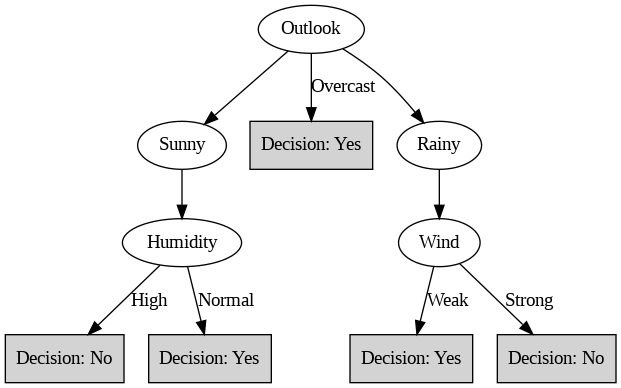

In [5]:
from IPython.display import Image
Image(filename = '/content/decision_tree.png')